<a href="https://colab.research.google.com/github/alexunderch/Bachelor_materials/blob/main/KG_course_ods/hws/KG2021RU_(CS224W_Colab_1)_(DONE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://habrastorage.org/webt/wm/bs/md/wmbsmdxsduiamoki0tpt8vgfvvq.png)

# Заимствовано с гордостью!
перевод публично доступных [материалов](https://colab.research.google.com/drive/1b9rZIjD7MUEKwYbXZc3dchTBTpzdrvpd?usp=sharing) курса [cs224w](http://web.stanford.edu/class/cs224w/)


# **CS224W - Colab 1**

В этом блокноте мы реализуем полноценный **ПАЙПЛАЙН** для **выучивания эмбеддингов вершин**. Нам предстоит выполнить следующие 3 шага.

Для начала загрузим ставший классикой в сетевом анализе граф - [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). И исследуем несколько графовых статистик для сети социальных связей каратистов.

Затем - преобразуем граф в тензор PyTorch tensor, что позволит заняться машинным обучением на графе.

Наконец, мы завершим первый алгоритм машинного обучения на графах: модель эмбеддингов вершин. Наша модель проще, чем алгоритмы DeepWalk / node2vec, рассмотренные в лекции. Однако реализация с помощью PyTorch будет интересным и непростым приключением.

Итак, приступим к делу!

**Обратите внимание**:  
Убедитесь в том, чтобы **последовательно запускать все ячейки с кодом**, таким образом промежуточные переменные будут переданы в последующую ячейку

## 1 Графы - основы
Для начала загрузим ставший классикой в сетевом анализе граф - [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). И исследуем несколько графовых статистик для сети социальных связей каратистов.

## Установка
Мы будем много раз пользоваться NetworkX в этом блокноте.

In [1]:
import networkx as nx

## Сети социальных связей каратистов Захари

[Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) -  это граф, описывающий социальную сеть 34 членов клуба карате и документирующий связи между учасниками, взаимодействовавшими вне клуба.

In [2]:
G = nx.karate_club_graph()

# G - неориентированный граф
type(G)

networkx.classes.graph.Graph

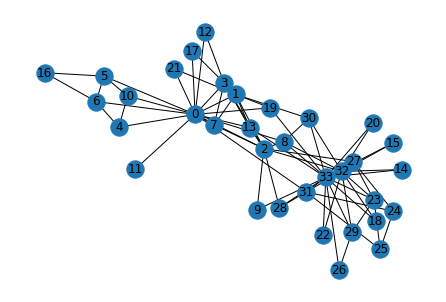

In [3]:
# Нарисуем граф
nx.draw(G, with_labels = True)

## Вопрос 1: Какова средняя степень вершины в сети связей каратистов? (5 баллов)

In [4]:
def average_degree(num_edges, num_nodes):
  # ЗАДАЧА: Реализуйте функцию, принимающую количество рёбер
  # и количество вершин, и возвращающую среднюю степень в 
  # графе. Округлите результат до ближайшего целого числа
  # (например, 3.3 → 3, а 3.7 → 4)

  avg_degree = 0

  ############# Ваш код здесь #############
  #https://math.stackexchange.com/questions/2375383/calculating-the-average-degree-in-a-directed-graph
  avg_degree = int(round(2 * num_edges / num_nodes, 0))
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## Вопрос 2: Каков средний коэффициент кластеризации в сети связей каратистов? (5 баллов)

In [5]:
def average_clustering_coefficient(G):
  # ЗАДАЧА: Реализуйте функцию, которая принимает nx.Graph
  # и возвращает средний коэффициент кластеризации. Округлите
  # дробную часть результата до 2 знаков  
  # (например, 3.333 → 3.33, а 3.7571 → 3.76)

  avg_cluster_coef = 0

  ############# Ваш код здесь #############
  ## Обратите внимание: 
  ## 1: Пожалуйста используйте функцию кластеризации NetworkX
  avg_cluster_coef = round(nx.average_clustering(G), 2)
  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Вопрос 3: Чему равно значение PageRank для вершины 0 (вершина с id 0) после одной итерации? (5 баллов)

Пожалуйста выполните задание путём реализации уравнения PageRank:  
    
$r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$

In [6]:
def one_iter_pagerank(G, beta, r0, node_id):
  # ЗАДАНИЕ: Реализуйте функцию, принимающую nx.Graph, beta, r0 и id вершины.
  # Возвращаемое значение r1 - это результат одной итерации PageRank для указанной вершины.
  # Пожалуйста округлите r1 до двух десятичных знаков.

  r1 = 0

  ############# Ваш код здесь #############
  ## Обратите внимание: 
  ## 1: You should not use nx.pagerank
  N = G.number_of_nodes()
  assert N > 0 
  r1 = (1. - beta) * (1./ N)
  for node_neighbor in G.neighbors(node_id):
        node_deg = G.degree[node_neighbor]
        r1 += beta * r0 / node_deg

  r1 = round(r1, 2)
  #########################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.13


## Вопрос 4: Чему равно значение (ненормированное) степени близости (closeness centrality) для вершины 5 в сети клуба каратистов? (5 баллов)

Уравнение для степени близости:  
$c(v) = \frac{1}{\sum_{u \neq v}\text{длина кратчайшего пути между } u \text{ и } v}$

In [12]:
def closeness_centrality(G, node=5):
  # ЗАДАЧА: Реализуйте функцию, вычисляющую степень близости для 
  # вершины в сети клуба каратистов. G - это граф сети связей клуба
  # каратистов, а node - id вершины в графе. Пожалуйста округлите 
  # значение степени близости до 2 десятичных знаков.

  closeness = 0

  ############# Ваш код здесь #############
  ## Обратите внимание:
  ## 1: Вы можете воспользоваться функцией networkx
  ## 2: Функция networkx возвращает нормированную степень близости, которая
  ## отличается от ненормированной, рассмотренной в лекции.
  closeness = nx.closeness_centrality(G, u = node)
  all_path = 0
  for path in list(nx.single_source_shortest_path(G, node).values())[1:]:
    all_path += len(path)-1

  assert all_path > 0
  closeness = 1 / all_path
  closeness = round(closeness, 2)
  #########################################

  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality {}".format(closeness))

The karate club network has closeness centrality 0.01


# 2 Граф в Тензор

Затем - преобразуем граф $G$ в тензор PyTorch, что позволит заняться машинным обучением на графе. 

## Установка
Проверим корректность установки PyTorch

In [7]:
import torch
print(torch.__version__)

1.11.0+cu113


## PyTorch - основы тензоров

Мы можем сгенерировать тензор PyTorch, заполненный нулями, единицами, либо псевдослучайными значениями.

In [13]:
# Инициализируем тензор размерности 3 x 4, заполненный единицами
ones = torch.ones(3, 4)
print(ones)

# Тензор размерности 3 x 4, заполненный нулями
zeros = torch.zeros(3, 4)
print(zeros)

# Тензор размерности 3 x 4, заполненный псевдослучайными значениями из интервала [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Посмотрим размерность тензора
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.5827, 0.0336, 0.1431, 0.8576],
        [0.4694, 0.4089, 0.2218, 0.6062],
        [0.6208, 0.0522, 0.1795, 0.2571]])
torch.Size([3, 4])


Тензор PyTorch содержит элементы одного типа, заданного параметром `dtype`.

In [14]:
# Создадим тензор размерности 3 x 4, заполненный 32-битными нулями с плавающей точкой
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Сменим тип данных (dtype) на 64-битный целочисленный
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Вопрос 5: Возьмём список рёбер графа связей клуба каратистов и преобразуем в `torch.LongTensor`. Чему равно значение `torch.sum` для тензора `pos_edge_index`? (10 баллов)

In [17]:
def graph_to_edge_list(G):
  # ЗАДАЧА: Реализуйте функцию, которая принимает nx.Graph и возвращает список рёбер.
  # Возвращаемый edge_list представляет собой список кортежей, в котором
  # каждая пара значений представляет собой ребро, соединяющее две
  # смежные вершины.

  edge_list = []

  ############# Ваш код здесь #############
  edge_list = list(G.edges())

  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # ЗАДАЧА: Реализуйте функцию, которая преобразует edge_list в тензор.
  # Подаваемый на вход edge_list представляет собой список кортежей, а
  # тензор на выходе должен быть размерности [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Ваш код здесь #############
  edge_index = torch.LongTensor(edge_list)
  edge_index = edge_index.T
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Вопрос 6: Пожалуйста, реализуйте негативный семплинг. Затем определите, какие рёбра (от edge_1 до edge_5) могут быть негативными в графе клуба каратистов? (10 баллов)

In [18]:
import random

def sample_negative_edges(G, num_neg_samples):
  # ЗАДАЧА: Реализуйте функцию, возвращающую список негативных (отсутствующих) рёбер.
  # Количество рёбер задаёт параметр num_neg_samples. Вам нет нужды учитывать 
  # граничный случай, когда количество возможных негативных рёбер менее чем
  # num_neg_samples. Достаточно, чтобы функция работала на графе сети связей
  # картистов. В данной реализации петли (рёбра вида (v,v)) не должны считаться
  # ни позитивными, ни негативными. Также обратите внимание на то, что граф сети
  # связей клуба каратистов - неориентированный граф, если (0, 1) - присутствует, 
  # как думаете, будет ли (1, 0) отсутствовать?

  neg_edge_list = []

  ############# Ваш код здесь #############
  edges_set = set(G.edges())
  visited_edges = set() #if we've already decilnesd some
  nodes = set(G.nodes())
  for i in nodes:
      for j in nodes:
          if not (i == j or (i, j) in edges_set or (j, i) in edges_set or\
                  (i, j) in visited_edges or (j, i) in visited_edges):
              visited_edges.add((i, j)) 
              visited_edges.add((j, i)) 
              neg_edge_list.append((i, j))
              if len(neg_edge_list) == num_neg_samples: return neg_edge_list

  #########################################

  return neg_edge_list

# Выберем 78 негативных рёбер
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Преобразуем список негативных рёбер в тензор
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Какие из следующих рёбер могут быть негативными?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Ваш код здесь #############
## Обратите внимание:
## 1: Для каждого из 5 рёбер, определите, может ли оно быть негативным
def is_neg_edge(edge):
    edges_set = set(G.edges())
    return not(edge in edges_set or tuple(reversed(edge)) in edges_set)

print(is_neg_edge(edge_1))
print(is_neg_edge(edge_2))
print(is_neg_edge(edge_3))
print(is_neg_edge(edge_4))
print(is_neg_edge(edge_5))

#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
False
True
False
False
True


# 3 Выучим эмбеддинги вершин
Наконец, мы завершим первый алгоритм машинного обучения на графах: модель эмбеддингов вершин.


## Установка

In [19]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.11.0+cu113


Для создания наших собственных методов выучивания эмбеддингов мы будем много раз обращаться к модулю [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) PyTorch. Посмотрим, как использовать `nn.Embedding`:

In [20]:
# Инициализируем слой эмбеддингов
# Предположим, что мы хотим создать эмбеддинги для 4 элементов (например, вершин)
# Каждый элемент будет представлен 8-мерным вектором

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


Мы можем выбрать элементы из матрицы эмбеддингов, используя индексы тензора

In [21]:
# Выберем эмбеддинг из emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Выберем несколько эмбеддингов
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Посмотрим размерность матрицы весов эмбеддинга
shape = emb_sample.weight.data.shape
print(shape)

# Перезапишем веса тензором из единиц
emb_sample.weight.data = torch.ones(shape)

# Проверим инициализацию эмбеддингов
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 0.0602,  0.5589, -1.3625,  0.5603,  0.5664,  0.6858,  1.8975, -0.4304]],
       grad_fn=<EmbeddingBackward0>)
tensor([[ 0.0602,  0.5589, -1.3625,  0.5603,  0.5664,  0.6858,  1.8975, -0.4304],
        [ 0.3348,  0.1604,  1.1464,  0.3923, -1.7987, -0.2845, -0.7004,  0.9196]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Пришло время создать матрицу эмбеддингов вершин графа!
- Мы хотим назначить **16-разрядный** вектор для каждой вершины в графе связей каратистов.
- Мы также хотим инициализировать матрицу значениями, равномерно распределёнными на интервале $[0, 1)$. Рекомендуем воспользоваться [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [25]:
# Пожалуйста не изменяйте и не сбрасывайте значение random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # ЗАДАЧА: Реализуйте функцию, создающую матрицу эмбеддингов вершин.
  # Возвращающу слой torch.nn.Embedding. Вам не требуется изменять
  # значения num_node и embedding_dim. Матрица весов возвращаемого 
  # слоя должна быть инизиализирована из равномерного распределения.

  emb = None

  ############# Ваш код здесь #############
  emb = torch.nn.Embedding(num_embeddings = num_node,
                           embedding_dim= embedding_dim)
  emb.weight.data.uniform_(-1, 1)
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Выведем на экраан слой эмбеддингов
print("Embedding: {}".format(emb))

# Пример обращения к эмбеддингам вершин 0 и 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[-0.5773,  0.4670, -0.7134,  0.9294, -0.4133,  0.5903,  0.0341, -0.4398,
          0.6678, -0.7630, -0.5291,  0.1199,  0.7933, -0.4285, -0.6089, -0.6384],
        [ 0.4972,  0.3093, -0.2314,  0.9640,  0.2024, -0.2580, -0.0142,  0.9830,
          0.6717, -0.0741,  0.9804,  0.4391, -0.5324, -0.9101,  0.5811,  0.9378]],
       grad_fn=<EmbeddingBackward0>)


## Визуализируем эмбеддинги в их начальном состоянии

Один из путей к понимаю матрицы эмбеддингов - визуализировать её содержимое на плоскости.

Здесь мы реализуем функцию визуализации для вас.
Сначала проведём анализ принципиальных компонент для снижения размерности до 2D.
Затем отрисуем каждую точку, окрашенную соответственно принадлежности сообществу.

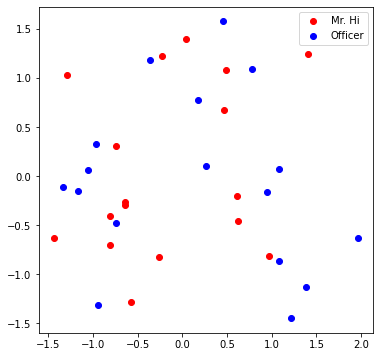

In [26]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Визуализируем эмбеддинги в их начальном (псевдослучайном) состоянии 

visualize_emb(emb)

## Вопрос 7: Выучим эмбеддинги! Какого наилучшего качества классификации удалось достигнуть? Чему равно значение функции потерь (loss) и доля верных ответов (accuracy)? (20 баллов)

In [31]:
from torch.optim import SGD

def accuracy(pred, label):
  # ЗАДАЧА: Реализуйте функцию, подсчитывающую долю верных ответов (accuracy). 
  # Эта функция принимает тензор с предсказаниями (на выходе после сигмоиды) и
  # тензор с метками классов (torch.LongTensor). Предсказанные значения более 0.5
  # классифицируются как класс 1. В противном случае - как класс 0.
  # Возвращаемое значение следует округлить до 4 десятичных позиций.
  # Например, доля верных ответов 0.82956 → 0.8296.

  accu = 0.0

  ############# Ваш код здесь #############
  import numpy as np
  pred = [1 if item > 0.5 else 0 for item in pred]
  num_match = (np.array(pred) == np.array(label)).sum()
  accu = num_match / len(label)
  accu = round(accu, 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  from tqdm.notebook import tqdm
  # ЗАДАЧА: Обучите слой эмбеддингов. Вы можете изменять количество эпох и 
  # скорость обучения. В общем, вам следует реализовать следующее:
  # (1) Взять эмбеддинги вершин из train_edge
  # (2) Скалярно умножить эмбеддинги для каждой пары вершин
  # (3) Отправить результат в сигмоиду
  # (4) Направить выход сигмоиды в loss_fn
  # (5) Вывести на экран значение функции потерь и долю верных ответов эпохи
  # (для самопроверки, значение функции потерь должно снижаться по ходу обучения)
  
  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in tqdm(range(epochs), total = epochs):

    ############# Ваш код здесь #############
    optimizer.zero_grad()
        
    # (1) 
    emb_set_u = emb(train_edge[0])
    emb_set_v = emb(train_edge[1])
    
    # (2)
    dot_prod = torch.sum(emb_set_u * emb_set_v, dim=-1)
    
    # (3) 
    sig = sigmoid(dot_prod)
    
    # (4) 
    loss = loss_fn(sig, train_label)
    
    loss.backward()  
    optimizer.step()  
    
    
    print(f"Loss for Epoch {i}: {loss}")
    print(f"Accuracy for is Epoch {i}: {accuracy(sig, train_label)}")
    print("#"*10)
    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Создадим позитивные и негативные метки классо
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Конкатенируем позитивне и негативные метки в один тензор
train_label = torch.cat([pos_label, neg_label], dim=0)

# Конкатенируем позитивные и негативные рёбра в один тензор
# Поскольку граф весьма мал, мы не будем разбивать данные на наборы для валидации/теста
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)

  0%|          | 0/500 [00:00<?, ?it/s]

Loss for Epoch 0: 0.001975479768589139
Accuracy for is Epoch 0: 1.0
##########
Loss for Epoch 1: 0.0019753153901547194
Accuracy for is Epoch 1: 1.0
##########
Loss for Epoch 2: 0.001974990824237466
Accuracy for is Epoch 2: 1.0
##########
Loss for Epoch 3: 0.001974532613530755
Accuracy for is Epoch 3: 1.0
##########
Loss for Epoch 4: 0.0019739551935344934
Accuracy for is Epoch 4: 1.0
##########
Loss for Epoch 5: 0.0019732643850147724
Accuracy for is Epoch 5: 1.0
##########
Loss for Epoch 6: 0.0019724725279957056
Accuracy for is Epoch 6: 1.0
##########
Loss for Epoch 7: 0.001971595920622349
Accuracy for is Epoch 7: 1.0
##########
Loss for Epoch 8: 0.001970630371943116
Accuracy for is Epoch 8: 1.0
##########
Loss for Epoch 9: 0.0019696045201271772
Accuracy for is Epoch 9: 1.0
##########
Loss for Epoch 10: 0.001968508819118142
Accuracy for is Epoch 10: 1.0
##########
Loss for Epoch 11: 0.0019673530478030443
Accuracy for is Epoch 11: 1.0
##########
Loss for Epoch 12: 0.001966149313375354
Ac

## Визуализируем полученные эмбеддинги

Здесь мы и нарисуем результат обучения!

Вы можете сравнить полученную диаграмму с предыдущим изображением эмбеддингов.
После обучения должно быть видно, что два класса разделены более очевидно.

Это - также отличная проверка вашей реализации.

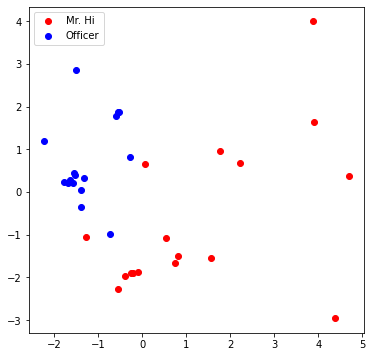

In [32]:
# Визуализируем обученные эмбеддинги
visualize_emb(emb)

# Ответы

Для получения оценки отправьте ответы на платформе ОДС.